In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import seaborn
plt.style.use('seaborn') #switch to seaborn style

# 2D

In [3]:
######  Определим константы  #######
ambient_temperature = 300. # K, температура окружающей среды To
flame_temperature = 1000. # температура нагрева, Tl
thermal_conductivity = 10. * 0.001 ** 2 # м2 / сек

######  Определим сетку  #######
dx = 0.001 # м, шаг сетки по оси x
size = 100 # 

## Выбор шага
##### Т.к. 2D - он должен бытьб в два раза меньше, чем в одномерное случае
##### Используем явную схему - вычисляем температуру на слое по известным значениям на предудущих слоях. Схема является условно устойчивой, что приводит к тому, что при малом шаге dx мы вынуждены брать еще более мелкий шаг по времени, чтобы обеспечить устойчивость
### h < 1/4 * (dx)**2 / thermal_conductivity

In [4]:
# здесь изменяем размер шага по времени
# h = 0.050 # сек, пороговое значение, при котором метод работает
# h = 0.070 # метод становится нестабильным - функция температуры осциллирует с каждым шагом по оси x
h = 1/4*(dx**2) / thermal_conductivity
print ('h_min', h)
h = 0.020 # сек
print ('h', h)
end_time = 10.0 # cек
num_steps = int(end_time / h) 
print ("num_steps:", num_steps)

h_min 0.025
h 0.02
num_steps: 500


## Явная схема

In [5]:
def heat_conduction():
    temperatures_old = (ambient_temperature*np.ones([size, size])) # K
    #temperatures_old = torch.from_numpy(temperatures_old)
    for iy in range(4*size//10, 5*size//10):
        for ix in range (4*size//10, 5*size//10):
            temperatures_old[iy, ix] = flame_temperature
    temperatures_new = np.copy(temperatures_old) # K
    
    for step in range(num_steps):
        for iy in range(1, size - 1):
            for ix in range(1, size - 1):
                temp = temperatures_old[iy, ix]
                #temperatures_new[iy, ix] = temp + h*thermal_conductivity/dx**2*(
                temperatures_new[iy, ix] = temp + h*thermal_conductivity/dx**2*(
                    temperatures_old[iy, ix-1] + temperatures_old[iy, ix+1] + temperatures_old[iy-1, ix] + 
                    temperatures_old[iy+1, ix] - 4.0*temp)
        temperatures_new, temperatures_old = temperatures_old, temperatures_new    
    return temperatures_old

def plot_me():
    #dimensions = [0, dx*size, 0, dx*size]
    plt.imshow(temperatures, cmap = matplotlib.cm.hot, origin = 'lower')
    #plt.imshow(temperatures, cmap = matplotlib.cm.hot, origin = 'lower', interpolation = 'spline36', extent = dimensions)
    plt.colorbar().set_label('Температура, К')
    plt.xlabel('Координаты X, м ', fontsize=15)     
    plt.ylabel('Координаты Y, м ', fontsize=15)     
    plt.show() 

In [8]:
%%time
temperatures = heat_conduction()

CPU times: user 6.53 s, sys: 3.91 ms, total: 6.54 s
Wall time: 6.53 s


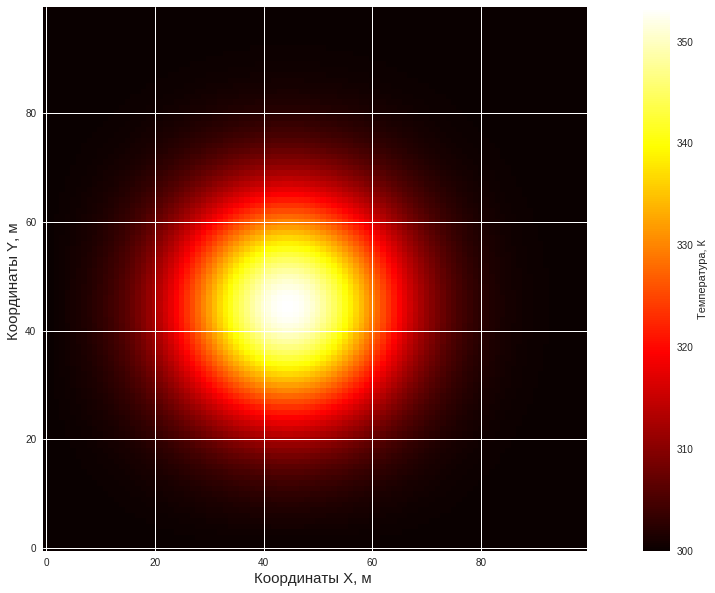

In [9]:
pylab.figure(figsize=(20,10))
plot_me()